# Análisis de una solución de la ecuación del calor

La solución de la ecuación 
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones de frontera:
$$\frac{\partial u(0,t)}{\partial x}=\frac{\partial u(1,t)}{\partial x}=0, \;\;\; t>0$$
Y la condición inicial:
$$u(x,0)=f(x),\;\;\;0<x<1$$ \\
$$f(x)=\begin{equation}
    \Biggl\{\begin{matrix}
        -2 & si &=0<x\leq 1/2 \\ 
        0 & si  &= 1/2<x<1
        \end{matrix}\\ \\ \\ \\
\end{equation}$$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,t)=-1-\sum_{n=1}^{\infty} [\frac{4}{n \pi}  \sin(n\pi)] \cos(n\pi x)e^{-(n\pi)^2 t}.$$

Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$.

In [1316]:
from pylab import *

Para empezar, graficamos la condición inicial.

In [1317]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = -2
    return y
def cero(x):
  return 0

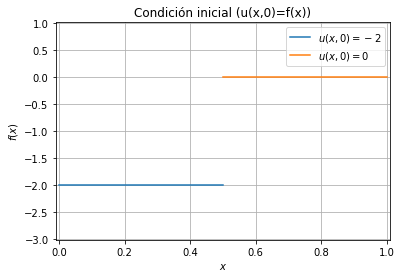

In [1318]:
x = linspace(0,1,1000)
f = np.piecewise(x,[(0<x) & (x<0.5), (0.5<x) & (x<1)], [lambda x: recta(x), lambda x: cero(x)])
cero=np.vectorize(cero)
plt.plot(x[x<0.5],recta(x[x<0.5]),label='$u(x,0)=-2$')
plt.plot(x[(0.5<x) & (x<1)],cero(x[(0.5<x) & (x<1)]),label='$u(x,0)=0$')
plt.title("Condición inicial (u(x,0)=f(x))")
plt.grid(True)
plt.legend()
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,1.01]),ylim([-3.01,1.01])
show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=f(x)=-2$.

In [1319]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f +=[(4/(n*pi))*sin((n*pi)/2)]*cos(n*pi*x)
    return -1-f

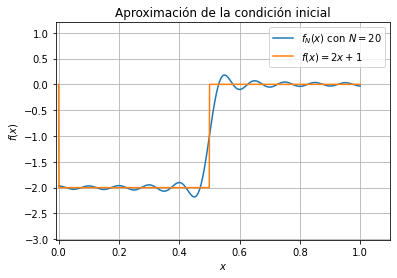

In [1320]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)=2x+1$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-3.01,1.2]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

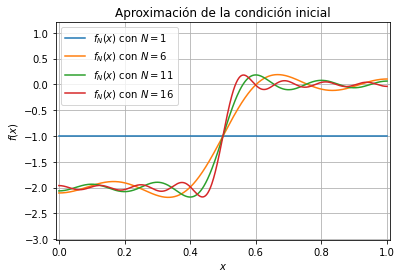

In [1321]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-3.01,1.2]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [1322]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += [(4/(n*pi))*sin((n*pi)/2)]*cos(n*pi*x)*exp(-n**2*pi**2*t[i])
    return -1-f

In [1323]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

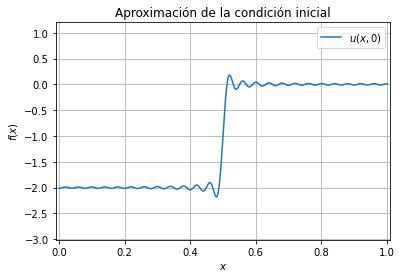

In [1324]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-3.01,1.2]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

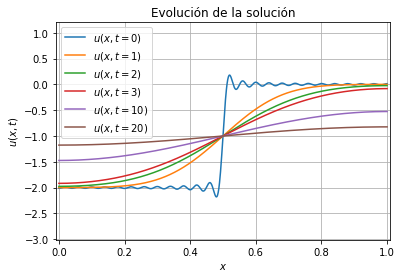

In [1325]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-3.01,1.2]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

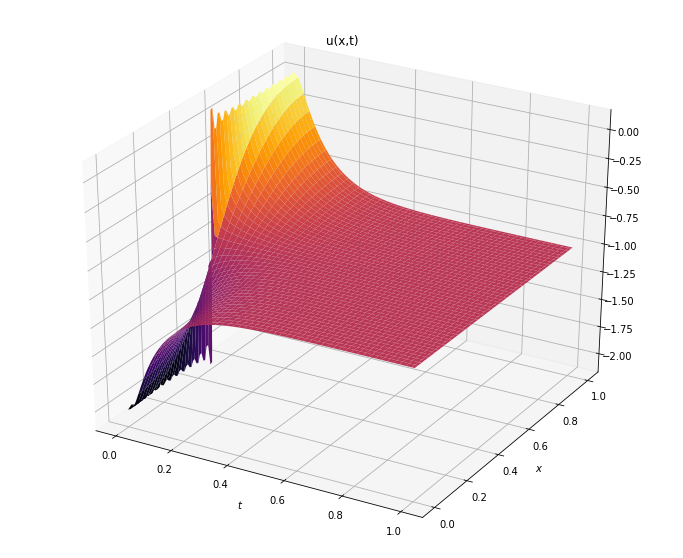

In [1326]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno"); #Otros colores:"viridis", "inferno", "plasma"